In [159]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
# Загружаем данные по потреблению в Центре
data = pd.read_csv('gen_Center.csv', sep=';')
data.head()

,INTERVAL,M_DATE,PRICE_ZONE_ID,POWER_SYS_ID,E_USE_FACT
0,0,2010-07-01,1,530000,18684.0
1,1,2010-07-01,1,530000,17925.0
2,2,2010-07-01,1,530000,17406.0
3,3,2010-07-01,1,530000,16951.0
4,4,2010-07-01,1,530000,16758.0


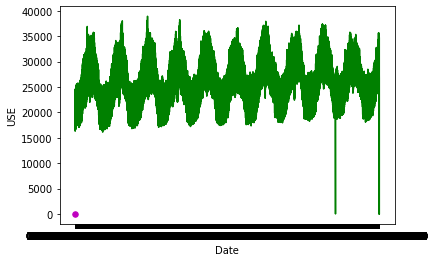

In [14]:
plt.scatter(0, 0, color="m", marker="o", s=30)
plt.plot(data['M_DATE'], data['E_USE_FACT'], color="g")
plt.xlabel("Date")
plt.ylabel("USE")
plt.show()


In [185]:
# Оставляем только первый час: он все равно коррелирует с другими
df = pd.DataFrame(columns=['M_DATE','E_USE_FACT'])
filter0 = data['INTERVAL'] == 0
filtered = data.loc[filter0]
df = filtered[['M_DATE','E_USE_FACT']]
df

,M_DATE,E_USE_FACT
0,2010-07-01,18684.0
24,2010-07-02,18570.0
48,2010-07-03,19109.0
72,2010-07-04,18399.0
96,2010-07-05,18227.0
...,...,...
91152,2020-11-23,27670.0
91176,2020-11-24,27526.0
91200,2020-11-25,27237.0
91224,2020-11-26,27403.0


# Загружаем данные температуры воздуха

In [186]:
dfTemperature = pd.read_csv('temper2.csv', sep=',')
dfTemperature

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2010-07-01,20.4,",,r",26.1,",,r",12.0,",,r"
1,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2010-07-02,22.4,",,r",29.2,",,r",12.5,",,r"
2,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2010-07-03,23.3,",,r",26.8,",,r",20.1,",,r"
3,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2010-07-04,22.4,",,r",26.8,",,r",15.7,",,r"
4,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2010-07-05,23.0,",,r",28.3,",,r",14.8,",,r"
...,...,...,...,...,...,...,...,...,...,...,...,...
3478,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2020-11-14,1.9,"H,,S",3.4,",,S",0.4,",,S"
3479,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2020-11-15,1.1,"H,,S",1.5,",,S",NaN,NaN
3480,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2020-11-16,-1.6,"H,,S",NaN,NaN,NaN,NaN
3481,RSM00027612,"MOSCOW, RS",55.8331,37.6167,156.0,2020-11-17,-5.2,"H,,S",-3.5,",,S",-7.1,",,S"


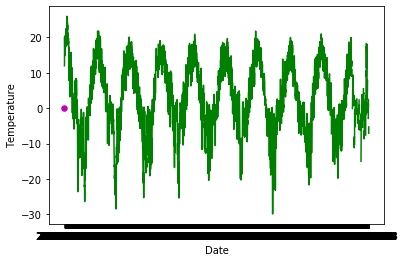

In [34]:
# Строим график температуры
plt.scatter(0, 0, color="m", marker="o", s=30)
plt.plot(dfTemperature['DATE'], dfTemperature['TMIN'], color="g")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()


In [163]:
dfTemperature.isna().sum() # Есть ли пустые данные и сколько?

STATION              0
NAME                 0
LATITUDE             0
LONGITUDE            0
ELEVATION            0
DATE                 0
TAVG               885
TAVG_ATTRIBUTES    885
TMAX                54
TMAX_ATTRIBUTES     54
TMIN                59
TMIN_ATTRIBUTES     59
dtype: int64

In [187]:
# Заполняем пустышки
dfTemperature['TMAX'] = dfTemperature.TMAX.fillna(dfTemperature.TMAX.mode()[0])

In [152]:
dfTemperature.isna().sum()

STATION              0
NAME                 0
LATITUDE             0
LONGITUDE            0
ELEVATION            0
DATE                 0
TAVG               885
TAVG_ATTRIBUTES    885
TMAX                 0
TMAX_ATTRIBUTES     54
TMIN                59
TMIN_ATTRIBUTES     59
dtype: int64

In [188]:
# Делаем одинаковые имена для хранения даты в двух датасетах перед объединением
df.rename(columns={'M_DATE': 'DATE'}, inplace=True)
# Преобразуем в формат даты
df['DATE']=pd.to_datetime(df['DATE'], yearfirst=True)
dfTemperature['DATE']=pd.to_datetime(dfTemperature['DATE'], yearfirst=True)
# Слияние двух датафреймов
df2 = df.merge(dfTemperature)

H:\Soft\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
H:\Soft\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [198]:
df2 = df2[['DATE','E_USE_FACT','TMAX']]
df2

,DATE,E_USE_FACT,TMAX
0,2010-07-01,18684.0,26.1
1,2010-07-02,18570.0,29.2
2,2010-07-03,19109.0,26.8
3,2010-07-04,18399.0,26.8
4,2010-07-05,18227.0,28.3
...,...,...,...
3478,2020-11-14,26936.0,3.4
3479,2020-11-15,26454.0,1.5
3480,2020-11-16,26507.0,2.2
3481,2020-11-17,27363.0,-3.5


# Корреляция температуры и потребления энергии 0,9!

In [155]:
df2.corr() 

,E_USE_FACT,TMAX
E_USE_FACT,1.000000,-0.905307
TMAX,-0.905307,1.000000


In [190]:
df2.to_csv('usetemp.csv')


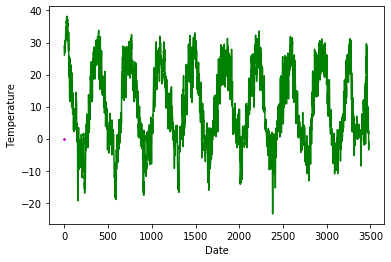

In [126]:
plt.scatter(0, 0, color="m", marker="o", s=3)
plt.plot(df2['TMAX'],  color="g")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()


In [199]:
df2.dropna()
df2.insert(loc=0, column='Period', value=np.arange(len(df2)))
df3 = df2.drop('DATE', axis=1)
df3 = df3.dropna()

X= df3.drop('E_USE_FACT', axis = 1).values
y= df3['E_USE_FACT'].values



In [197]:
df3.isna().sum()

Period        0
E_USE_FACT    0
TMAX          0
dtype: int64

# Разбиваем на обучающую и тестовую выборки


In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=0)
X_test[:2]

array([[ 985. ,   -3.2],
       [1297. ,  -12.9]])

# Создаем регрессионную модель на MLP

In [247]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, hidden_layer_sizes = 20, max_iter=15000).fit(X_train, y_train)
pred = regr.predict([[3482, -1]])
r2 = regr.score(X_test, y_test)

In [248]:
pred

array([27514.61296108])

In [249]:
r2

0.8827224683812223

# Долгосрочный проноз по ВВП

In [316]:
# Грузим данные из Excel
data = pd.read_excel('GDP-Energy.xlsx', sheet_name='GDPEnergy')
data

,Year,GDP,GDPR,PE
0,1998,290.230000,2629.6,827200
1,1999,209.770000,4823.2,846200
2,2000,278.070000,7305.6,877800
3,2001,328.270000,8943.6,891300
4,2002,369.900000,10830.5,891000
5,2003,460.740000,13080.2,916000
6,2004,632.760000,17027.2,932000
7,2005,817.750000,21609.8,953100
8,2006,1059.990000,26917.2,995800
9,2007,1391.680000,33247.5,1015300


# Корреляция производства энергии с ВВП в долларах 0,72

In [253]:

data.corr()

,Year,GDP,GDPR,PE
Year,1.000000,0.801075,0.987296,0.608457
GDP,0.801075,1.000000,0.778786,0.722697
GDPR,0.987296,0.778786,1.000000,0.589731
PE,0.608457,0.722697,0.589731,1.000000


In [317]:
# Убираем ВВП в рублях как менее значимый
data = data.drop('GDPR', axis=1)
# Пробуем со шкаолой времени и без нее. С ней выше результат обучения
#data = data.drop('Year', axis=1) 
X= data.drop('PE', axis = 1).values
y= data['PE'].values
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=0)
X_train

array([[2019.        , 1689.49482466],
       [2009.        , 1309.17      ],
       [2017.        , 1578.41      ],
       [2006.        , 1059.99      ],
       [2004.        ,  632.76      ],
       [2014.        , 2056.58      ],
       [2002.        ,  369.9       ],
       [2000.        ,  278.07      ],
       [2003.        ,  460.74      ],
       [2015.        , 1363.7       ],
       [2007.        , 1391.68      ],
       [2005.        ,  817.75      ],
       [2016.        , 1282.66      ],
       [2001.        ,  328.27      ],
       [1998.        ,  290.23      ],
       [2013.        , 2289.24      ],
       [2010.        , 1632.84      ]])

# Строим линейную регрессию

In [319]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True).fit(X_train,y_train)
pred = model.predict([[2021,1650]])
r2 = model.score(X_test, y_test)

In [320]:
pred

array([1120118.12327059])

In [321]:
r2

0.939969394125197